In [1]:
import torch
from matplotlib import pyplot as plt
from math import ceil
import os
from glob import glob
import torch
from torchvision import transforms as tr
from torch.utils.data import DataLoader,Dataset
from PIL import Image


#加载本地数据的类
class LocalDataset(Dataset):
    def __init__(self, data_list, label,transform=None):
        self.transform = transform
        self.x = data_list
        self.label = label

    def __getitem__(self, index):
        img = Image.open(self.x[index]).convert('RGB')
        if self.transform is not None:img = self.transform(img)
        return img[:,15:,:],(int(self.x[index][-8:-4])-110)

    def __len__(self):
        return len(self.x)



#加载本地的数据集
def local_datasets(data_path,label,bt,PM,NM=0):
    numclass_path = glob(os.path.join(data_path, '*'))

    data_transform = {"train": tr.Compose([
        tr.Resize((329,329)),
        tr.ToTensor()])}

    train_dataset = LocalDataset(numclass_path,label,transform=data_transform["train"])
    train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=bt, shuffle=False,num_workers=NM,pin_memory=PM)

    return train_loader

import pandas as pd
label = pd.read_excel("/kaggle/input/apcmc/Attachment 2.xlsx")
train_loader= local_datasets('/kaggle/input/apcmc/Attachment 1/Attachment 1',label,1,True)

from torchvision.utils import save_image
!mkdir -p /kaggle/working/facadescd/train/
!mkdir -p /kaggle/working/facadescd/test/
for (img,index) in train_loader:
    if(index==len(train_loader)):continue
    save_image(img,"/kaggle/working/facadescd/train/%d.jpg"%index[0])
    if(index==0):continue
    save_image(img,"/kaggle/working/facadescd/test/%d.jpg"%(index[0]-1))

'\nimport torch\nfrom matplotlib import pyplot as plt\nfrom math import ceil\n\n#画损失函数图\ndef plot_curve(data):\n    fig = plt.figure()\n    plt.plot(range(len(data)), data, color=\'blue\')\n    plt.legend([\'value\'], loc=\'upper right\')\n    plt.xlabel(\'step\')\n    plt.ylabel(\'value\')\n    plt.savefig("/kaggle/working/loss.jpg")\n    plt.show()\n\n\n#画出每一个batchsize中的图片\ndef plot_image(img,label,pred=None):\n    fig = plt.figure()\n    for i in range(len(img)):\n        plt.subplot(ceil(len(img)**0.5), ceil(len(img)**0.5), i + 1)\n        plt.tight_layout()\n        plt.imshow(img[i].transpose(0,1).transpose(1,2))\n        if(pred is not None):plt.title("true:{} predict:{}".format(label[i].item(),pred[i].item()))\n        else:plt.title("{} D.C.".format(label[i].item()))\n        plt.xticks([])\n        plt.yticks([])\n    plt.show()\n\ndef one_hot(label, depth):\n    out = torch.zeros(label.size(0), depth)\n    idx = torch.LongTensor(label).view(-1, 1)\n    out.scatter_(dim=1, in

In [2]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix
%cd pytorch-CycleGAN-and-pix2pix/
!pip install -r requirements.txt
!bash ./datasets/download_pix2pix_dataset.sh facades

/kaggle/working/pytorch-CycleGAN-and-pix2pix
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 1.7 MB/s eta 0:00:0000:0100:010m
  Preparing metadata (setup.py) ... done
  Created wheel for visdom: filename=visdom-0.2.3-py3-none-any.whl size=1417108 sha256=e1cda30df946528587b9bb196d53553442864f69717752a29e03cacdb2316061
  Stored in directory: /root/.cache/pip/wheels/6c/cc/34/0a5e6c65ecd5efecaebb4e9a913d438643dbc50e739d1662ca
Successfully built visdom


In [7]:
!python train.py --dataroot /kaggle/input/facadescd/facadescd --name facades_pix2pix --model pix2pix --direction AtoB  --lr 0.001 --continue_train 

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: /kaggle/input/facadescd/facadescd	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                   

In [36]:
for i in range(4):
    !python test.py --dataroot /kaggle/input/facadescd/facadescd --direction AtoB --model pix2pix --name facades_pix2pix --results_dir /kaggle/working/test 

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: /kaggle/input/facadescd/facadescd	[default: None]
             dataset_mode: aligned                       
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                         

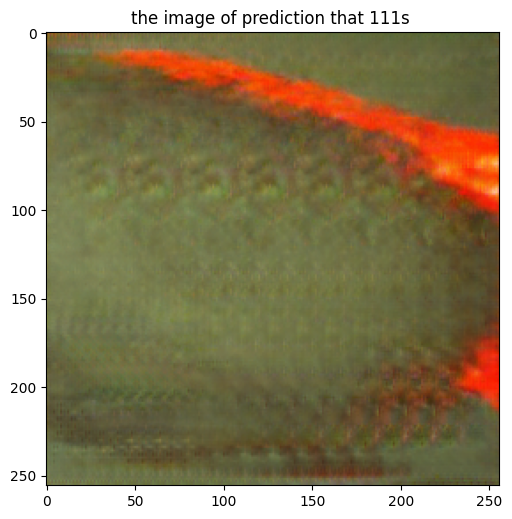

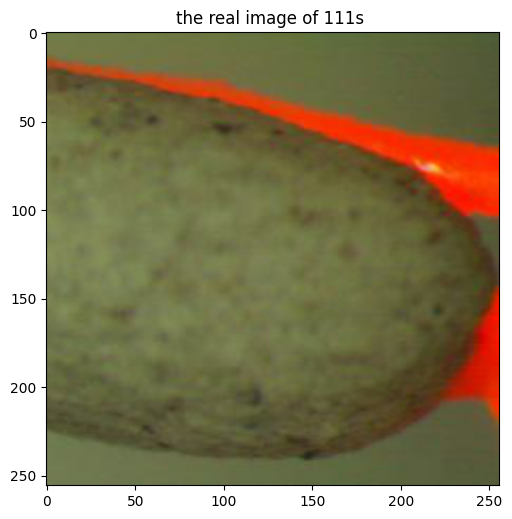

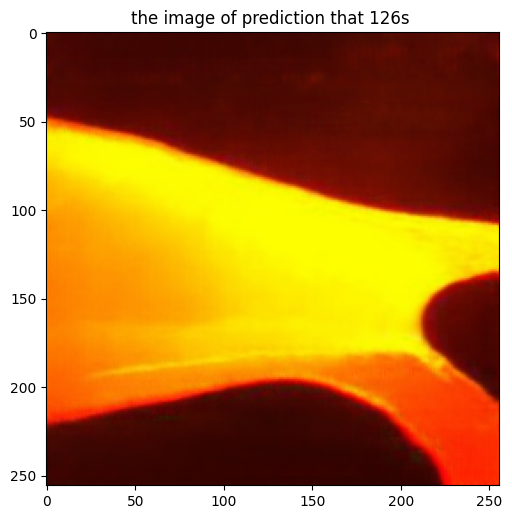

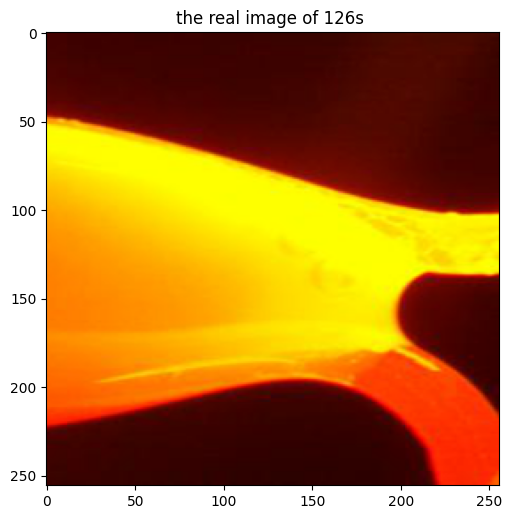

In [59]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/kaggle/working/test/facades_pix2pix/test_latest/images/0_fake_B.png").convert('RGB')
plt.figure(figsize=(10,6),dpi=100)
plt.imshow(img)
plt.title("the image of prediction that 111s ")
plt.savefig("/kaggle/working/img/0_predit.jpg")
plt.show()

from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/kaggle/working/test/facades_pix2pix/test_latest/images/0_real_B.png").convert('RGB')
plt.figure(figsize=(10,6),dpi=100)
plt.imshow(img)
plt.title("the real image of 111s ")
plt.savefig("/kaggle/working/img/0_real.jpg")
plt.show()

from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/kaggle/working/test/facades_pix2pix/test_latest/images/125_fake_B.png").convert('RGB')
plt.figure(figsize=(10,6),dpi=100)
plt.imshow(img)
plt.title("the image of prediction that 126s ")
plt.savefig("/kaggle/working/img/0_predit.jpg")
plt.show()

from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/kaggle/working/test/facades_pix2pix/test_latest/images/125_real_B.png").convert('RGB')
plt.figure(figsize=(10,6),dpi=100)
plt.imshow(img)
plt.title("the real image of 126s ")
plt.savefig("/kaggle/working/img/0_real.jpg")
plt.show()

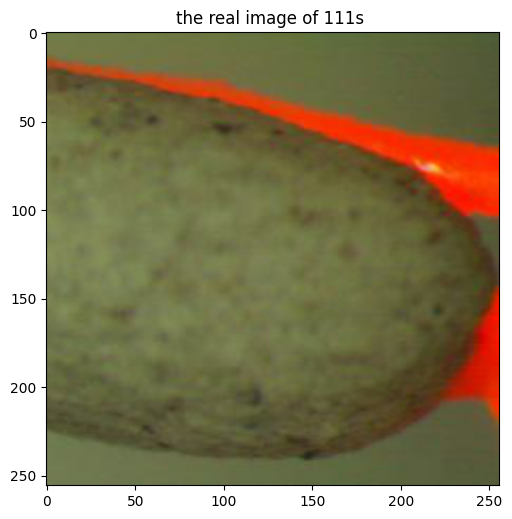